## Analysis and Visualization of Scraped Data

In [10]:
# Libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [3]:
# Load the cleaned data
data = pd.read_csv('C:/Users/rizwa/Desktop/Rizwan/Projects/British_Airways_Virtual_Internship/BA_reviews.csv')
# print(data)
df = data.drop(columns=['Unnamed: 0'])
print(df)

     RECOMMENDED  REVIEW_RATING   
0            yes              5  \
1            yes              1   
2            yes              1   
3            yes              1   
4            yes              1   
...          ...            ...   
2995          no             10   
2996          no              9   
2997          no              3   
2998          no              9   
2999          no              9   

                                            REVIEW_TEXT  
0     "never fly this awful airline again"   | i had...  
1     "i’ll never fly with them again"  | we started...  
2     "the worst of the worst"  | i fly british airw...  
3     "everyone refused to help us"   | everything w...  
4     "not a single feedback from british airways"  ...  
...                                                 ...  
2995  british airways customer review flew ba256 fro...  
2996  british airways customer review 9 april 2015 b...  
2997  british airways customer review we flew for th...  

### Columns and Data types

In [4]:
print(df.columns)
print("--------------------------------------------------------------------")
print(df.dtypes)

Index(['RECOMMENDED', 'REVIEW_RATING', 'REVIEW_TEXT'], dtype='object')
--------------------------------------------------------------------
RECOMMENDED      object
REVIEW_RATING     int64
REVIEW_TEXT      object
dtype: object


### Total Reviews 

In [5]:
print(f" Total Number or Reviews Collented  ---> {len(df)}")

 Total Number or Reviews Collented  ---> 3000


### Sentiment Analysis

In [6]:
reviews = df['REVIEW_TEXT']
sentiments = []

for review in reviews:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

categorized_sentiments = []

for sentiment in sentiments:
    if sentiment > 0.1:
        categorized_sentiments.append('Positive')
    elif sentiment < -0.1:
        categorized_sentiments.append('Negative')
    else:
        categorized_sentiments.append('Neutral')

df['Sentiment'] = categorized_sentiments
print(df)

     RECOMMENDED  REVIEW_RATING   
0            yes              5  \
1            yes              1   
2            yes              1   
3            yes              1   
4            yes              1   
...          ...            ...   
2995          no             10   
2996          no              9   
2997          no              3   
2998          no              9   
2999          no              9   

                                            REVIEW_TEXT Sentiment  
0     "never fly this awful airline again"   | i had...  Negative  
1     "i’ll never fly with them again"  | we started...  Negative  
2     "the worst of the worst"  | i fly british airw...   Neutral  
3     "everyone refused to help us"   | everything w...  Negative  
4     "not a single feedback from british airways"  ...   Neutral  
...                                                 ...       ...  
2995  british airways customer review flew ba256 fro...   Neutral  
2996  british airways customer revi

### Visualizing the Sentiment - Bar Chart

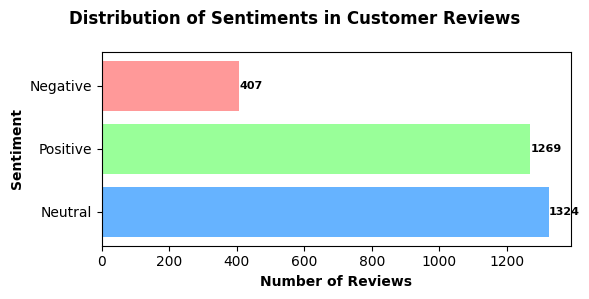

In [7]:
sentiment_counts = df['Sentiment'].value_counts()

colors = ['#66b3ff', '#99ff99', '#ff9999']

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

fig.suptitle('Distribution of Sentiments in Customer Reviews', fontsize=12, fontweight='bold')

bars = ax.barh(sentiment_counts.keys(), sentiment_counts.values, color=colors)
ax.set_xlabel('Number of Reviews', fontsize=10, fontweight='bold')
ax.set_ylabel('Sentiment', fontsize=10, fontweight='bold')

for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), 
            ha='left', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

#### Sentiment Analysis of Customer Reviews :  
Sentiment Analysis was performed on customer reviews using TextBlob.
Sentiments were categorized into three groups: Positive, Negative, and Neutral.  
The sentiment distribution reveals:  
* __Positive : 1269__ reviews are positive, indicating a satisfied customer base.  
* __Neutral : 1324__ reviews are neutral, suggesting a balanced sentiment.  
* __Negative : 407__ reviews are negative, signaling areas that might need improvement.

### Word Cloud

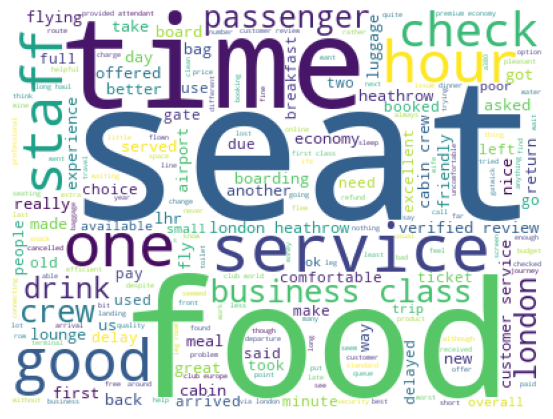

In [14]:
all_reviews = ' '.join(df['REVIEW_TEXT'])

stopwords = set(STOPWORDS)
stopwords.update(['the', 'and', 'to', 'of', 'in', 'for', 'on', 'with', 'it', 'was', 'as', 'at', 
                  'this', 'that','ba','flight','airline','airlines','british','airway','flights',
                   'will','called','british airway','much','still','plane','even','told','airways','aircraft','u',
                   'given','now','well'])

wordcloud = WordCloud(width=400, height=300, background_color='white', stopwords=stopwords, max_words=500).generate(all_reviews)

plt.figure(figsize=(6,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### WordCloud of Customer Review Keywords
* A WordCloud was generated from the collective review texts.  
* Removed common words (the,and,to,in etc..) and words like flight,british airways,ba,airline etc.. for accuracy.  
* Prominent keywords include __seat,time,food,service,good,one hour,staff,crew,business class__  
* These keywords provide valuable insights into the most frequently mentioned aspects of the customer experience.  

### Distribution of Review Ratings

In [9]:
average_rating = df['REVIEW_RATING'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 4.50


### Histogram of Review Ratings

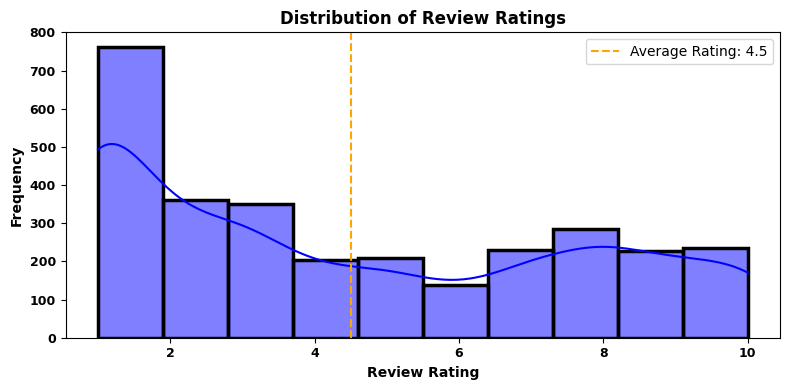

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='REVIEW_RATING', bins=10, kde=True, color='blue', linewidth=2.5)

# Adding vertical line for average rating
plt.axvline(x=average_rating, color='orange', linestyle='--', label=f'Average Rating: {average_rating:.1f}')
plt.legend()

plt.title('Distribution of Review Ratings', fontsize=12,fontweight='bold')
plt.xlabel('Review Rating', fontsize=10,fontweight='bold')
plt.ylabel('Frequency', fontsize=10,fontweight='bold')
plt.xticks(fontsize=9,fontweight='bold')
plt.yticks(fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

#### Distribution of Review Ratings

* The average review rating is __4.5/10__ indicating a generally neutral customer sentiment.  
* The histogram showcases the distribution of review ratings across different bins.  
* This visualization provides a clear overview of the distribution of review ratings, helping to assess the general sentiment of customers towards the product or service.
